In [3]:
import os

os.system("gdown 1C0aYI36oCDHSJCY3O69xV2QwycdJ2Rvl")


Downloading...
From (uriginal): https://drive.google.com/uc?id=1C0aYI36oCDHSJCY3O69xV2QwycdJ2Rvl
From (redirected): https://drive.google.com/uc?id=1C0aYI36oCDHSJCY3O69xV2QwycdJ2Rvl&confirm=t&uuid=0fa41d32-86d8-40f8-bb02-d496faa15434
To: /home/mion/s/222/bolber/ennca/code/city_seg.zip
100%|██████████| 211M/211M [00:05<00:00, 39.0MB/s] 


0

Task: Build the Dataset object that load image and mask separately. The necessary functions are listed below.

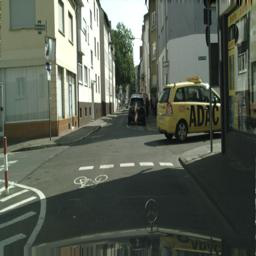

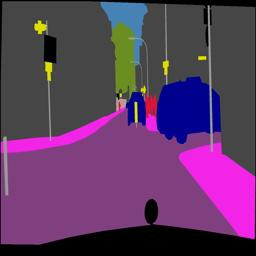

In [11]:
from PIL import Image
img = Image.open('../data/cityscapes_data/val/1.jpg')

width, height = img.size

left_box = (0, 0, width // 2, height)
right_box = (width // 2, 0, width, height)

left_half = img.crop(left_box)
right_half = img.crop(right_box)

display(left_half)
display(right_half)

# left_half.show()
# right_half.show()

In [49]:
from torch.utils.data import Dataset
from os import listdir
from os.path import isfile, join
from PIL import Image

class CityscapesSplitDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f))]
        assert len(self.img_files) != 0

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_files[idx])
        img = Image.open(img_path)
        width, height = img.size
        left_box = (0, 0, width // 2, height)
        right_box = (width // 2, 0, width, height)
        left_half = img.crop(left_box)
        right_half = img.crop(right_box)

        if self.transform:
            left_half = self.transform(left_half)
            right_half = self.transform(right_half)
        return left_half, right_half


In [50]:
transform = transforms.Compose([
    transforms.PILToTensor(),
])
val_dataset = CityscapesSplitDataset("../data/cityscapes_data/val/", transform=transform)
print(len(val_dataset))
train_dataset = CityscapesSplitDataset("../data/cityscapes_data/train/", transform=transform)
print(len(train_dataset))

500
2975


torch.Size([1, 3, 256, 256]) torch.Size([1, 3, 256, 256])


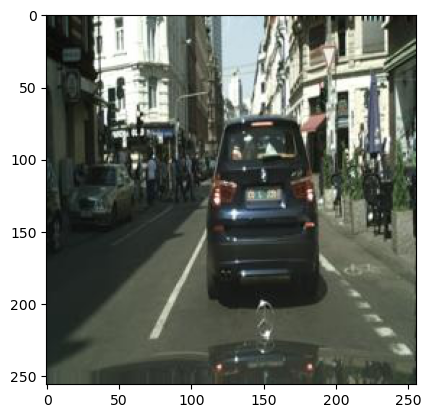

In [52]:
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

val_dataloader = DataLoader(val_dataset)
img, mask = next(val_dataloader.__iter__())
print(img.shape, mask.shape)
plt.imshow(  img.squeeze(0).permute(1, 2, 0)  )


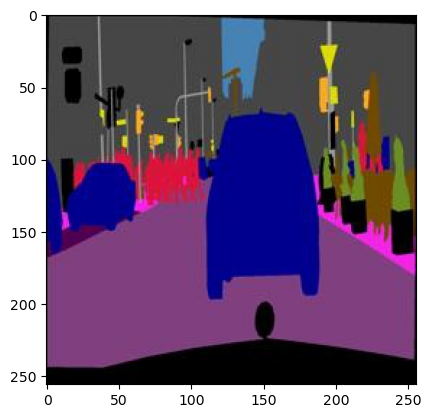

In [53]:
plt.imshow(  mask.squeeze(0).permute(1, 2, 0)  )

In [13]:
mapping_20 = { 
        0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 8, 9: 1,
        10: 1, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 3, 18: 3, 19: 3,
        20: 3, 21: 4, 22: 4, 23: 5, 24: 6, 25: 6, 26: 7, 27: 7, 28: 7, 29: 7,
        30: 7, 31: 7, 32: 7, 33: 7, 34: 7
    }

In [14]:
from collections import namedtuple
Label = namedtuple( 'Label' , ['name', 'id', 'trainId', 'category', 'categoryId', 'hasInstances', 'ignoreInEval', 'color'])

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'ground'          , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'ground'          , 8       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'ground'          , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'ground'          , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),

    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),

    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , 34 ,       19 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),]


In [16]:
import numpy as np
id2color = { label.id : np.asarray(label.color) for label in labels }

In [17]:
id2color

{0: array([0, 0, 0]),
 1: array([0, 0, 0]),
 2: array([0, 0, 0]),
 3: array([0, 0, 0]),
 4: array([0, 0, 0]),
 5: array([111,  74,   0]),
 6: array([81,  0, 81]),
 7: array([128,  64, 128]),
 8: array([244,  35, 232]),
 9: array([250, 170, 160]),
 10: array([230, 150, 140]),
 11: array([70, 70, 70]),
 12: array([102, 102, 156]),
 13: array([190, 153, 153]),
 14: array([180, 165, 180]),
 15: array([150, 100, 100]),
 16: array([150, 120,  90]),
 17: array([153, 153, 153]),
 18: array([153, 153, 153]),
 19: array([250, 170,  30]),
 20: array([220, 220,   0]),
 21: array([107, 142,  35]),
 22: array([152, 251, 152]),
 23: array([ 70, 130, 180]),
 24: array([220,  20,  60]),
 25: array([255,   0,   0]),
 26: array([  0,   0, 142]),
 27: array([ 0,  0, 70]),
 28: array([  0,  60, 100]),
 29: array([ 0,  0, 90]),
 30: array([  0,   0, 110]),
 31: array([  0,  80, 100]),
 32: array([  0,   0, 230]),
 33: array([119,  11,  32]),
 34: array([  0,   0, 142])}

In [18]:
def find_closest_labels_vectorized(mask, mapping): # 'mapping' is a RGB color tuple to categorical number dictionary
    
    closest_distance = np.full([mask.shape[0], mask.shape[1]], 10000) 
    closest_category = np.full([mask.shape[0], mask.shape[1]], None)   

    for id, color in mapping.items(): # iterate over every color mapping
        dist = np.sqrt(np.linalg.norm(mask - color.reshape([1,1,-1]), axis=-1))
        is_closer = closest_distance > dist
        closest_distance = np.where(is_closer, dist, closest_distance)
        closest_category = np.where(is_closer, id, closest_category)
    
    return closest_category

In [19]:
import numpy as np
data=find_closest_labels_vectorized(np.array(right_half),id2color)

In [20]:
np.unique(data)

array([0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22,
       23, 24, 26, 27, 28, 29, 30, 31, 33], dtype=object)

In [1]:
import math
import torch
from torch import nn
from torch.nn import functional as F

Task2: Build FFNet UP-A, UP-B and UP-C separately. You need to forward some example data to make sure that the whole pipline works fine.

In [2]:
BN_MOMENTUM = 0.1
gpu_up_kwargs = {"mode": "bilinear", "align_corners": True}
mobile_up_kwargs = {"mode": "nearest"}
relu_inplace = True

In [3]:
class ConvBNReLU(nn.Module):
    def __init__(
        self,
        in_chan,
        out_chan,
        ks=3,
        stride=1,
        padding=1,
        activation=nn.ReLU,
        *args,
        **kwargs,
    ):
        super(ConvBNReLU, self).__init__()
        layers = [
            nn.Conv2d(
                in_chan,
                out_chan,
                kernel_size=ks,
                stride=stride,
                padding=padding,
                bias=False,
            ),
            nn.BatchNorm2d(out_chan, momentum=BN_MOMENTUM),
        ]
        if activation:
            layers.append(activation(inplace=relu_inplace))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)


In [4]:
class AdapterConv(nn.Module):
    def __init__(
        self, in_channels=[256, 512, 1024, 2048], out_channels=[64, 128, 256, 512]
    ):
        super(AdapterConv, self).__init__()
        assert len(in_channels) == len(
            out_channels
        ), "Number of input and output branches should match"
        self.adapter_conv = nn.ModuleList()

        for k in range(len(in_channels)):
            self.adapter_conv.append(
                ConvBNReLU(in_channels[k], out_channels[k], ks=1, stride=1, padding=0),
            )

    def forward(self, x):
        out = []
        for k in range(len(self.adapter_conv)):
            out.append(self.adapter_conv[k](x[k]))
        return out

In [5]:
class UpsampleCat(nn.Module):
    def __init__(self, upsample_kwargs=gpu_up_kwargs):
        super(UpsampleCat, self).__init__()
        self._up_kwargs = upsample_kwargs

    def forward(self, x):
        """Upsample and concatenate feature maps."""
        assert isinstance(x, list) or isinstance(x, tuple)
        # print(self._up_kwargs)
        x0 = x[0]
        _, _, H, W = x0.size()
        for i in range(1, len(x)):
            x0 = torch.cat([x0, F.interpolate(x[i], (H, W), **self._up_kwargs)], dim=1)
        return x0

In [6]:
class UpBranch(nn.Module):
    def __init__(
        self,
        in_channels=[64, 128, 256, 512],
        out_channels=[128, 128, 128, 128],
        upsample_kwargs=gpu_up_kwargs,
    ):
        super(UpBranch, self).__init__()

        self._up_kwargs = upsample_kwargs

        self.fam_32_sm = ConvBNReLU(
            in_channels[3], out_channels[3], ks=3, stride=1, padding=1
        )
        self.fam_32_up = ConvBNReLU(
            in_channels[3], in_channels[2], ks=1, stride=1, padding=0
        )
        self.fam_16_sm = ConvBNReLU(
            in_channels[2], out_channels[2], ks=3, stride=1, padding=1
        )
        self.fam_16_up = ConvBNReLU(
            in_channels[2], in_channels[1], ks=1, stride=1, padding=0
        )
        self.fam_8_sm = ConvBNReLU(
            in_channels[1], out_channels[1], ks=3, stride=1, padding=1
        )
        self.fam_8_up = ConvBNReLU(
            in_channels[1], in_channels[0], ks=1, stride=1, padding=0
        )
        self.fam_4 = ConvBNReLU(
            in_channels[0], out_channels[0], ks=3, stride=1, padding=1
        )

        self.high_level_ch = sum(out_channels)
        self.out_channels = out_channels

    def forward(self, x):

        feat4, feat8, feat16, feat32 = x

        smfeat_32 = self.fam_32_sm(feat32)
        upfeat_32 = self.fam_32_up(feat32)

        _, _, H, W = feat16.size()
        x = F.interpolate(upfeat_32, (H, W), **self._up_kwargs) + feat16
        smfeat_16 = self.fam_16_sm(x)
        upfeat_16 = self.fam_16_up(x)

        _, _, H, W = feat8.size()
        x = F.interpolate(upfeat_16, (H, W), **self._up_kwargs) + feat8
        smfeat_8 = self.fam_8_sm(x)
        upfeat_8 = self.fam_8_up(x)

        _, _, H, W = feat4.size()
        smfeat_4 = self.fam_4(
            F.interpolate(upfeat_8, (H, W), **self._up_kwargs) + feat4
        )

        return smfeat_4, smfeat_8, smfeat_16, smfeat_32


In [7]:
class FFNetUpHeadA(nn.Module):
    def __init__(
        self,
        in_chans,
        base_chans=[64, 128, 256, 512],
    ):
        super(FFNetUpHeadA, self).__init__()
        layers = []
        base_chans = [64, 128, 256, 512]
        layers.append(AdapterConv(in_chans, base_chans))
        in_chans = base_chans[:]
        layers.append(UpBranch(in_chans))
        layers.append(UpsampleCat())
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)
    
class FFNetUpHeadB(nn.Module):
    def __init__(
        self,
        in_chans,
        base_chans=[64, 128, 128, 256],
    ):
        super(FFNetUpHeadB, self).__init__()
        layers = []
        layers.append(AdapterConv(in_chans, base_chans))
        in_chans = base_chans[:]
        layers.append(UpBranch(in_chans, [96, 96, 64, 32]))
        layers.append(UpsampleCat())
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)
    
class FFNetUpHeadC(nn.Module):
    def __init__(
        self,
        in_chans,
        base_chans = [128, 128, 128, 128]
    ):
        super(FFNetUpHeadC, self).__init__()
        layers = []
        layers.append(AdapterConv(in_chans, base_chans))
        in_chans = base_chans[:]
        layers.append(UpBranch(in_chans, [128, 16, 16, 16]))
        layers.append(UpsampleCat())
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

In [8]:
c1 = torch.randn([1, 40, 64, 64])
c2 = torch.randn([1, 112, 32, 32])
c3 = torch.randn([1, 192, 16, 16])
c4 = torch.randn([1, 192, 16, 16])
head_a = FFNetUpHeadA([40, 112, 192, 192])
ret_a = head_a([c1, c2, c3, c4])
print(ret_a.shape)

head_b = FFNetUpHeadB([40, 112, 192, 192])
ret_b = head_b([c1, c2, c3, c4])
print(ret_b.shape)

head_c = FFNetUpHeadC([40, 112, 192, 192])
ret_c = head_c([c1, c2, c3, c4])
print(ret_c.shape)

torch.Size([1, 512, 64, 64])
torch.Size([1, 288, 64, 64])
torch.Size([1, 176, 64, 64])


Task: replace convolution units in ffn with InvertedResidual block.

In [9]:
class InvertedResidual(nn.Module):
    def __init__(self, inp, oup, stride, expand_ratio):
        super(InvertedResidual, self).__init__()
        assert stride in [1, 2]

        hidden_dim = round(inp * expand_ratio)
        self.identity = stride == 1 and inp == oup

        if expand_ratio == 1:
            self.conv = nn.Sequential(
                # dw
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # pw-linear
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )
        else:
            self.conv = nn.Sequential(
                # pw
                nn.Conv2d(inp, hidden_dim, 1, 1, 0, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # dw
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # pw-linear
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )
    def forward(self, x):
        if self.identity:
            return x + self.conv(x)
        else:
            return self.conv(x)


In [10]:
class AdapterInv(nn.Module):
    def __init__(
        self, in_channels=[256, 512, 1024, 2048], out_channels=[64, 128, 256, 512]
    ):
        super(AdapterInv, self).__init__()
        assert len(in_channels) == len(
            out_channels
        ), "Number of input and output branches should match"
        self.adapter_conv = nn.ModuleList()

        for k in range(len(in_channels)):
            self.adapter_conv.append(
                InvertedResidual(in_channels[k], out_channels[k], expand_ratio=1, stride=1),
            )

    def forward(self, x):
        out = []
        for k in range(len(self.adapter_conv)):
            out.append(self.adapter_conv[k](x[k]))
        return out

In [14]:
class UpBranchInv(nn.Module):
    def __init__(
        self,
        in_channels=[64, 128, 256, 512],
        out_channels=[128, 128, 128, 128],
        upsample_kwargs=gpu_up_kwargs,
    ):
        super(UpBranchInv, self).__init__()

        self._up_kwargs = upsample_kwargs

        self.fam_32_sm = InvertedResidual(in_channels[3], out_channels[3], expand_ratio=1, stride=1)
        self.fam_32_up = InvertedResidual(in_channels[3], in_channels[2], expand_ratio=1, stride=1)
        self.fam_16_sm = InvertedResidual(in_channels[2], out_channels[2], expand_ratio=1, stride=1)
        self.fam_16_up = InvertedResidual(in_channels[2], in_channels[1], expand_ratio=1, stride=1)
        self.fam_8_sm = InvertedResidual(in_channels[1], out_channels[1], expand_ratio=1, stride=1)
        self.fam_8_up = InvertedResidual(in_channels[1], in_channels[0], expand_ratio=1, stride=1)
        self.fam_4 = InvertedResidual(in_channels[0], out_channels[0], expand_ratio=1, stride=1)

        self.high_level_ch = sum(out_channels)
        self.out_channels = out_channels

    def forward(self, x):

        feat4, feat8, feat16, feat32 = x

        smfeat_32 = self.fam_32_sm(feat32)
        upfeat_32 = self.fam_32_up(feat32)

        _, _, H, W = feat16.size()
        x = F.interpolate(upfeat_32, (H, W), **self._up_kwargs) + feat16
        smfeat_16 = self.fam_16_sm(x)
        upfeat_16 = self.fam_16_up(x)

        _, _, H, W = feat8.size()
        x = F.interpolate(upfeat_16, (H, W), **self._up_kwargs) + feat8
        smfeat_8 = self.fam_8_sm(x)
        upfeat_8 = self.fam_8_up(x)

        _, _, H, W = feat4.size()
        smfeat_4 = self.fam_4(
            F.interpolate(upfeat_8, (H, W), **self._up_kwargs) + feat4
        )

        return smfeat_4, smfeat_8, smfeat_16, smfeat_32

In [15]:
class FFNetUpHeadAInv(nn.Module):
    def __init__(
        self,
        in_chans,
        base_chans=[64, 128, 256, 512],
    ):
        super(FFNetUpHeadAInv, self).__init__()
        layers = []
        base_chans = [64, 128, 256, 512]
        layers.append(AdapterInv(in_chans, base_chans))
        in_chans = base_chans[:]
        layers.append(UpBranchInv(in_chans))
        layers.append(UpsampleCat())
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)
    
class FFNetUpHeadBInv(nn.Module):
    def __init__(
        self,
        in_chans,
        base_chans=[64, 128, 128, 256],
    ):
        super(FFNetUpHeadBInv, self).__init__()
        layers = []
        layers.append(AdapterInv(in_chans, base_chans))
        in_chans = base_chans[:]
        layers.append(UpBranchInv(in_chans, [96, 96, 64, 32]))
        layers.append(UpsampleCat())
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)
    
class FFNetUpHeadCInv(nn.Module):
    def __init__(
        self,
        in_chans,
        base_chans = [128, 128, 128, 128]
    ):
        super(FFNetUpHeadCInv, self).__init__()
        layers = []
        layers.append(AdapterInv(in_chans, base_chans))
        in_chans = base_chans[:]
        layers.append(UpBranchInv(in_chans, [128, 16, 16, 16]))
        layers.append(UpsampleCat())
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

In [16]:
c1 = torch.randn([1, 40, 64, 64])
c2 = torch.randn([1, 112, 32, 32])
c3 = torch.randn([1, 192, 16, 16])
c4 = torch.randn([1, 192, 16, 16])
head_a = FFNetUpHeadAInv([40, 112, 192, 192])
ret_a = head_a([c1, c2, c3, c4])
print(ret_a.shape)

head_b = FFNetUpHeadBInv([40, 112, 192, 192])
ret_b = head_b([c1, c2, c3, c4])
print(ret_b.shape)

head_c = FFNetUpHeadCInv([40, 112, 192, 192])
ret_c = head_c([c1, c2, c3, c4])
print(ret_c.shape)

torch.Size([1, 512, 64, 64])
torch.Size([1, 288, 64, 64])
torch.Size([1, 176, 64, 64])
